In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx

from pathlib import Path
from dreaminsg_integrated_model.src.network_recovery import *
import dreaminsg_integrated_model.src.simulation as simulation
from dreaminsg_integrated_model.src.network_sim_models.integrated_network import *

from dreaminsg_integrated_model.src.network_sim_models.interdependencies import *

from dreaminsg_integrated_model.src.optimizer import *
import dreaminsg_integrated_model.src.plots as model_plots

import random

In [3]:
micropolis_network = IntegratedNetwork(name = 'Micropolis')

In [4]:
MAIN_DIR = Path('..//..')
network_dir= 'micropolis'

water_file = MAIN_DIR/f'dreaminsg_integrated_model/data/networks/{network_dir}/water/water.inp'
power_file = MAIN_DIR/f'dreaminsg_integrated_model/data/networks/{network_dir}/power/power.json'
transp_folder = MAIN_DIR/f'dreaminsg_integrated_model/data/networks/{network_dir}/transportation/'

# load all infrastructure networks
micropolis_network.load_networks(water_file, power_file, transp_folder, power_sim_type = '3ph')

C:\Users\srijith\anaconda3\envs\redcar\lib\site-packages\wntr\epanet\io.py:2173: UserWarning: Not all curves were used in "..\..\dreaminsg_integrated_model\data\networks\micropolis\water\water.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


Water network successfully loaded from ..\..\dreaminsg_integrated_model\data\networks\micropolis\water\water.inp. The analysis type is set to Pressure Dependent Demand Analysis.
initial simulation duration: 60s; hydraulic time step: 60s; pattern time step: 3600s

Power system successfully loaded from ..\..\dreaminsg_integrated_model\data\networks\micropolis\power\power.json. Three phase power flow simulation will be used.

Transportation network successfully loaded from ..\..\dreaminsg_integrated_model\data\networks\micropolis\transportation. Static traffic assignment method will be used to calculate travel times.


In [5]:
micropolis_network.generate_integrated_graph()

Successfully added power network to the integrated graph...
Successfully added water network to the integrated graph...
Successfully added transportation network to the integrated graph...
Integrated graph successffully created.


Loading BokehJS ...

In [6]:
import dreaminsg_integrated_model.src.hazard_initiator as hazard

In [7]:
bomb_blast = hazard.RadialDisruption(point_of_occurrence=(5000, 4000), radius_of_impact= 300)

The point of occurrence is set to (5000, 4000).
The radius of impact is set to 300.


There are 57 affected infrastructure nodes.
There are 66 affected infrastructure links.


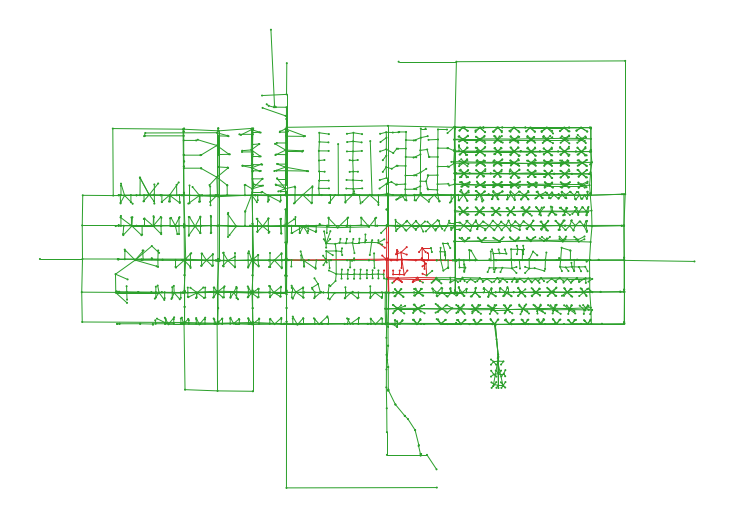

In [11]:
affected_nodes, affected_links = bomb_blast.get_affected_components(micropolis_network)